In [28]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

### According to the labels in the CSV file, the sclerotic and non-sclerotic glomeruli images were divided into training, validation, and test sets. The corresponding images were then copied into their respective folders.

In [4]:

G_dir = "D:/course/3/public/globally_sclerotic_glomeruli"
NG_dir = "D:/course/3/public/non_globally_sclerotic_glomeruli"
csv_file = "D:/course/3/public/public.csv"
train_dir = "D:/course/3"
val_dir = "D:/course/3"
output_base_dir = "D:/course/3"  


df = pd.read_csv(csv_file)


df_G = df[df['ground truth'] == 1]  
df_NG = df[df['ground truth'] == 0] 


train_G, temp_G = train_test_split(df_G, test_size=0.3, random_state=0) 
val_G, test_G = train_test_split(temp_G, test_size=0.5, random_state=0) 


train_NG, temp_NG = train_test_split(df_NG, test_size=0.3, random_state=0)  
val_NG, test_NG = train_test_split(temp_NG, test_size=0.5, random_state=0) 


for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_base_dir, split, 'globally_sclerotic_glomeruli'), exist_ok=True)
    os.makedirs(os.path.join(output_base_dir, split, 'non_globally_sclerotic_glomeruli'), exist_ok=True)


def copy_images(data_df, source_dir_G, source_dir_NG, target_folder, category):
    """
    data_df: 数据框
    source_dir_G: 硬化类图片源文件夹
    source_dir_NG: 非硬化类图片源文件夹
    target_folder: 目标文件夹 (train/val/test)
    category: 类别 'G' 表示硬化, 'NG' 表示非硬化
    """
    for index, row in data_df.iterrows():
        if category == 'G':
            src_path = os.path.join(source_dir_G, row['name'])  
            dest_path = os.path.join(target_folder, "globally_sclerotic_glomeruli", row['name'])
        elif category == 'NG':
            src_path = os.path.join(source_dir_NG, row['name']) 
            dest_path = os.path.join(target_folder, "non_globally_sclerotic_glomeruli", row['name'])
        
     
        if os.path.exists(src_path):
            shutil.copy(src_path, dest_path)


copy_images(train_G, G_dir, NG_dir, os.path.join(output_base_dir, 'train'), 'G')
copy_images(val_G, G_dir, NG_dir, os.path.join(output_base_dir, 'val'), 'G')
copy_images(test_G, G_dir, NG_dir, os.path.join(output_base_dir, 'test'), 'G')


copy_images(train_NG, G_dir, NG_dir, os.path.join(output_base_dir, 'train'), 'NG')
copy_images(val_NG, G_dir, NG_dir, os.path.join(output_base_dir, 'val'), 'NG')
copy_images(test_NG, G_dir, NG_dir, os.path.join(output_base_dir, 'test'), 'NG')

print("Done")

Done


### Three types of data augmentation (flipping and rotation) were applied to the globally_sclerotic_glomeruli images in the training dataset. The augmented images were renamed by appending the suffixes "_1", "_2", and "_3" to the original file names, and then saved into the train_aug folder.

In [15]:

def augmentation1(image):
    """翻转一次，然后旋转0度"""
    return transforms.functional.hflip(image) 

def augmentation2(image):
    """不翻转，旋转180度"""
    return transforms.functional.rotate(image, 180) 

def augmentation3(image):
    """翻转一次，然后旋转180度"""
    flipped_image = transforms.functional.hflip(image) 
    return transforms.functional.rotate(flipped_image, 180)  


input_dir = "D:/course/3/train/globally_sclerotic_glomeruli"
output_dir = "D:/course/3/train_aug"
os.makedirs(output_dir, exist_ok=True) 


In [16]:

for img_name in os.listdir(input_dir):
    img_path = os.path.join(input_dir, img_name)
    

    image = Image.open(img_path).convert("RGB")
    

    for i, augment_func in enumerate([augmentation1, augmentation2, augmentation3], 1):
   
        transformed_image = augment_func(image)
        
     
        save_path = os.path.join(output_dir, f"{os.path.splitext(img_name)[0]}_{i}.png")
        
     
        transformed_image.save(save_path)

print("Done")

Done


### So far, the train_aug folder contains the augmented images of globally_sclerotic_glomeruli. Next, the images from both subfolders (globally_sclerotic_glomeruli and non_globally_sclerotic_glomeruli) from the original train folder are copied into the train_aug folder. As a result, the train_aug folder now includes the original globally_sclerotic_glomeruli images, the original non_globally_sclerotic_glomeruli images, along with the three types of augmented globally_sclerotic_glomeruli images.

In [17]:

train_G_dir = "D:/course/3/train/globally_sclerotic_glomeruli"
train_NG_dir = "D:/course/3/train/non_globally_sclerotic_glomeruli"

def copy_images(source_dir, target_dir):
    for img_name in os.listdir(source_dir):
        src_path = os.path.join(source_dir, img_name)
        target_path = os.path.join(target_dir, img_name)
        shutil.copy(src_path, target_path)  


copy_images(train_G_dir, output_dir)
copy_images(train_NG_dir, output_dir)
print("Done")

Done


### Check the total number of different image sizes in the 'train_aug' folder."

In [19]:

output_dir = "D:/course/3/train_aug"


image_sizes = {}


for img_name in os.listdir(output_dir):
    img_path = os.path.join(output_dir, img_name)
    

    with Image.open(img_path) as img:
        size = img.size  
        
   
        if size in image_sizes:
            image_sizes[size] += 1
        else:
            image_sizes[size] = 1


for size, count in image_sizes.items():
    print(f"size: {size}, how many: {count}")

size: (791, 811), how many: 1
size: (866, 903), how many: 1
size: (880, 833), how many: 1
size: (405, 396), how many: 1
size: (901, 869), how many: 1
size: (813, 724), how many: 1
size: (664, 653), how many: 1
size: (984, 768), how many: 1
size: (421, 450), how many: 1
size: (832, 938), how many: 1
size: (882, 977), how many: 1
size: (1012, 1090), how many: 1
size: (550, 490), how many: 1
size: (888, 818), how many: 1
size: (981, 944), how many: 1
size: (1083, 791), how many: 1
size: (835, 925), how many: 1
size: (848, 957), how many: 1
size: (493, 359), how many: 1
size: (280, 274), how many: 1
size: (576, 405), how many: 1
size: (367, 470), how many: 4
size: (439, 567), how many: 4
size: (1070, 1027), how many: 1
size: (1103, 1058), how many: 1
size: (796, 894), how many: 1
size: (867, 890), how many: 1
size: (1143, 1118), how many: 1
size: (964, 753), how many: 1
size: (806, 785), how many: 1
size: (783, 809), how many: 1
size: (965, 1012), how many: 1
size: (1000, 801), how many: 1

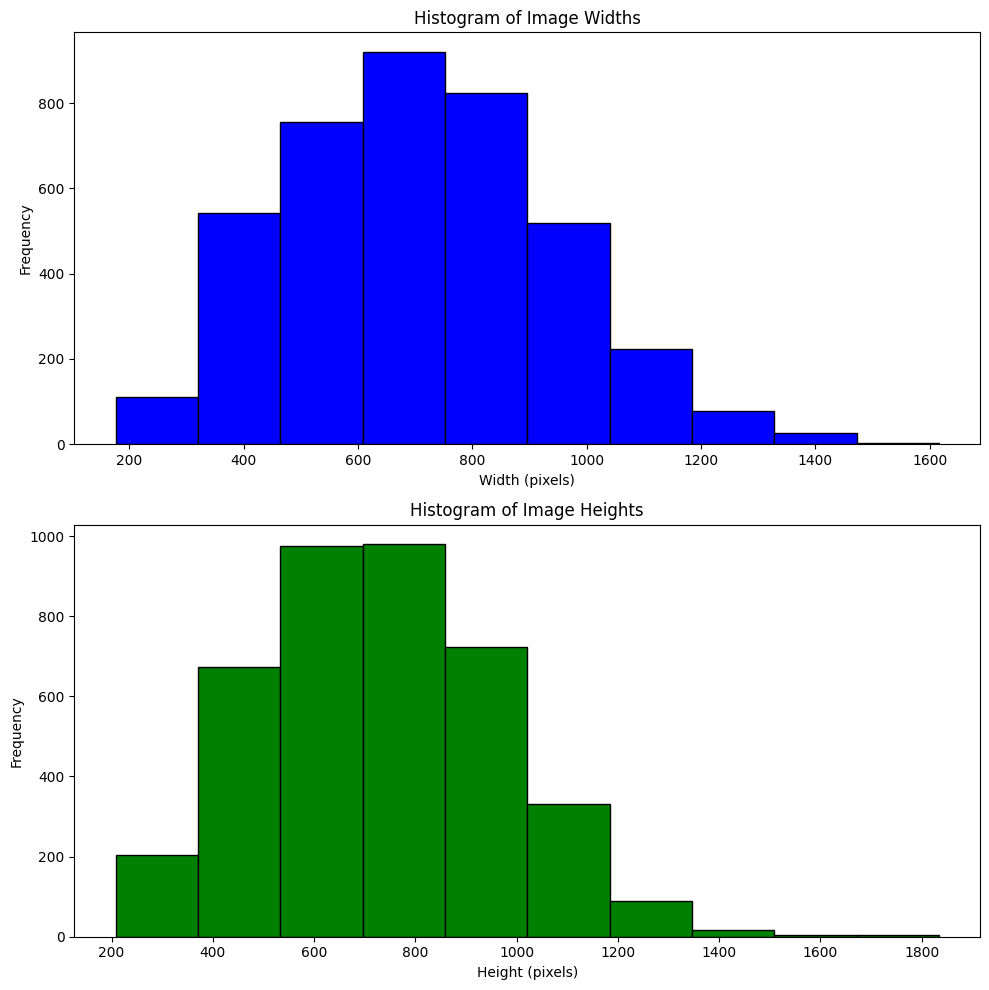

In [22]:

widths = [size[0] for size in image_sizes.keys()]
heights = [size[1] for size in image_sizes.keys()]


fig, axs = plt.subplots(2, 1, figsize=(10, 10))


axs[0].hist(widths, bins=10, color='blue', edgecolor='black')
axs[0].set_title('Histogram of Image Widths')
axs[0].set_xlabel('Width (pixels)')
axs[0].set_ylabel('Frequency')


axs[1].hist(heights, bins=10, color='green', edgecolor='black')
axs[1].set_title('Histogram of Image Heights')
axs[1].set_xlabel('Height (pixels)')
axs[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

1. Create three folders: train_aug_resize, val_resize, and test_resize.
2. Copy the images from train_aug to train_aug_resize.
3. Copy the images from the two subfolders globally_sclerotic_glomeruli and non_globally_sclerotic_glomeruli in the val folder to val_resize.
4. Copy the images from the two subfolders globally_sclerotic_glomeruli and non_globally_sclerotic_glomeruli in the test folder to test_resize.
5. Resize and pad all the images in the train_aug_resize, val_resize, and test_resize folders, so that the final image size is 224x224.

In [29]:

def create_folder(folder_path):
    os.makedirs(folder_path, exist_ok=True)
    print(f"Folder '{folder_path}' created or already exists.")


def copy_images(source_folder, target_folder):
    create_folder(target_folder) 
    for file_name in os.listdir(source_folder):
        source_file = os.path.join(source_folder, file_name)
        if os.path.isfile(source_file):
            shutil.copy(source_file, target_folder)
            print(f"Copied '{file_name}' to '{target_folder}'.")

In [30]:

base_dir = "D:/course/3"


create_folder(f"{base_dir}/train_aug_resize")
copy_images(f"{base_dir}/train_aug", f"{base_dir}/train_aug_resize")

create_folder(f"{base_dir}/val_resize")
copy_images(f"{base_dir}/val/globally_sclerotic_glomeruli", f"{base_dir}/val_resize")
copy_images(f"{base_dir}/val/non_globally_sclerotic_glomeruli", f"{base_dir}/val_resize")

create_folder(f"{base_dir}/test_resize")
copy_images(f"{base_dir}/test/globally_sclerotic_glomeruli", f"{base_dir}/test_resize")
copy_images(f"{base_dir}/test/non_globally_sclerotic_glomeruli", f"{base_dir}/test_resize")

Folder 'D:/course/3/train_aug_resize' created or already exists.
Folder 'D:/course/3/train_aug_resize' created or already exists.
Copied '18-142_PAS_1of6_647e17ac435c92704a564fdd.png' to 'D:/course/3/train_aug_resize'.
Copied '18-142_PAS_1of6_647e17ac435c92704a564fde.png' to 'D:/course/3/train_aug_resize'.
Copied '18-142_PAS_1of6_647e17ac435c92704a564fdf.png' to 'D:/course/3/train_aug_resize'.
Copied '18-142_PAS_1of6_647e17ac435c92704a564fe0.png' to 'D:/course/3/train_aug_resize'.
Copied '18-142_PAS_1of6_647e17ac435c92704a564fe1.png' to 'D:/course/3/train_aug_resize'.
Copied '18-142_PAS_1of6_647e17ac435c92704a564fe2.png' to 'D:/course/3/train_aug_resize'.
Copied '18-142_PAS_1of6_647e17ac435c92704a564fe3.png' to 'D:/course/3/train_aug_resize'.
Copied '18-142_PAS_1of6_647e17ac435c92704a564fe9.png' to 'D:/course/3/train_aug_resize'.
Copied '18-142_PAS_1of6_647e17ac435c92704a564fea.png' to 'D:/course/3/train_aug_resize'.
Copied '18-142_PAS_1of6_647e17ac435c92704a564feb.png' to 'D:/course/3

In [25]:
def resize_and_pad(img_path, output_size=(224, 224)):

    img = Image.open(img_path)
    

    original_width, original_height = img.size
    ratio = min(output_size[0] / original_width, output_size[1] / original_height)
    new_width = int(original_width * ratio)
    new_height = int(original_height * ratio)
    img_resized = img.resize((new_width, new_height), Image.Resampling.LANCZOS)  # 使用 LANCZOS 替代 ANTIALIAS
    

    new_img = Image.new("RGB", output_size, (255, 255, 255))
    

    upper = (output_size[1] - new_height) // 2
    left = (output_size[0] - new_width) // 2
    new_img.paste(img_resized, (left, upper))
    
    return new_img


In [31]:

def apply_resize_and_pad(folder_path):

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        if os.path.isfile(img_path):

            processed_image = resize_and_pad(img_path)
            processed_image.save(img_path) 
            print(f"Processed and saved {img_path}")


base_dir = "D:/course/3"


for folder in ["train_aug_resize", "val_resize", "test_resize"]:
    folder_path = os.path.join(base_dir, folder)
    apply_resize_and_pad(folder_path)

Processed and saved D:/course/3\train_aug_resize\18-142_PAS_1of6_647e17ac435c92704a564fdd.png
Processed and saved D:/course/3\train_aug_resize\18-142_PAS_1of6_647e17ac435c92704a564fde.png
Processed and saved D:/course/3\train_aug_resize\18-142_PAS_1of6_647e17ac435c92704a564fdf.png
Processed and saved D:/course/3\train_aug_resize\18-142_PAS_1of6_647e17ac435c92704a564fe0.png
Processed and saved D:/course/3\train_aug_resize\18-142_PAS_1of6_647e17ac435c92704a564fe1.png
Processed and saved D:/course/3\train_aug_resize\18-142_PAS_1of6_647e17ac435c92704a564fe2.png
Processed and saved D:/course/3\train_aug_resize\18-142_PAS_1of6_647e17ac435c92704a564fe3.png
Processed and saved D:/course/3\train_aug_resize\18-142_PAS_1of6_647e17ac435c92704a564fe9.png
Processed and saved D:/course/3\train_aug_resize\18-142_PAS_1of6_647e17ac435c92704a564fea.png
Processed and saved D:/course/3\train_aug_resize\18-142_PAS_1of6_647e17ac435c92704a564feb.png
Processed and saved D:/course/3\train_aug_resize\18-142_PAS_

### The following verifies the categories of 0 and 1 in the train_aug_resize folder, and the results are correct. Initially, there were 737 images for category 1. After performing data augmentation three times on each image, each original image has now been augmented into four images. Thus, the total number of images for category 1 is 737 * 4 = 2,948.

In [33]:

df['name_length'] = df['name'].apply(lambda x: len(str(x)))


name_length_counts = df['name_length'].value_counts()
name_length_counts

name_length
51    4935
44     720
46      66
42      37
Name: count, dtype: int64

In [37]:

def get_random_ground_truth(img_folder, csv_file, sample_size=10):

    df = pd.read_csv(csv_file)
    
 
    image_labels = {row['name']: row['ground truth'] for _, row in df.iterrows()}
    

    all_images = os.listdir(img_folder)
    random_images = random.sample(all_images, min(sample_size, len(all_images)))
    

    for img_name in random_images:
 
        if img_name.endswith('_1.png') or img_name.endswith('_2.png') or img_name.endswith('_3.png'):
            original_name = img_name.rsplit('_', 1)[0] + '.png'
        else:
            original_name = img_name
        

        if original_name in image_labels:
            label = image_labels[original_name]
            print(f"Image: {img_name}, Original: {original_name}, Ground Truth: {label}")
        else:
            print(f"Original image {original_name} not found in CSV for {img_name}")


In [38]:
img_folder = 'train_aug_resize' 
csv_file = "public/public.csv" 
get_random_ground_truth(img_folder, csv_file, sample_size=10)

Image: S-2001-000090_PAS_1of2_64542e4e435c92704a33aec6.png, Original: S-2001-000090_PAS_1of2_64542e4e435c92704a33aec6.png, Ground Truth: 0
Image: S-2002-007648_PAS_2of2_64542f11435c92704a350c35.png, Original: S-2002-007648_PAS_2of2_64542f11435c92704a350c35.png, Ground Truth: 0
Image: S-2006-002138_PAS_2of2_64762d5f435c92704a44d6d1.png, Original: S-2006-002138_PAS_2of2_64762d5f435c92704a44d6d1.png, Ground Truth: 0
Image: S-2006-005093_PAS_2of2_6454335a435c92704a397a76_3.png, Original: S-2006-005093_PAS_2of2_6454335a435c92704a397a76.png, Ground Truth: 1
Image: S-2010-013043_PAS_1of2_64552795435c92704a3e03c4_2.png, Original: S-2010-013043_PAS_1of2_64552795435c92704a3e03c4.png, Ground Truth: 1
Image: 31-10001_PAS_2of2_6475826a435c92704a43b118_1.png, Original: 31-10001_PAS_2of2_6475826a435c92704a43b118.png, Ground Truth: 1
Image: 31-10001_PAS_2of2_6475826a435c92704a43b0ee.png, Original: 31-10001_PAS_2of2_6475826a435c92704a43b0ee.png, Ground Truth: 0
Image: 32-2_PAS_1of2_6475826e435c92704a43

In [39]:

image_labels = {row['name']: row['ground truth'] for _, row in df.iterrows()}


label_count = {0: 0, 1: 0}


for img_name in os.listdir(img_folder):

    if img_name.endswith('_1.png') or img_name.endswith('_2.png') or img_name.endswith('_3.png'):
        original_name = img_name.rsplit('_', 1)[0] + '.png'
    else:
        original_name = img_name
    

    if original_name in image_labels:
        label = image_labels[original_name]
        label_count[label] += 1

label_count

{0: 3292, 1: 2948}